# Statistiques sur les données

In [2]:
import os
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np

path = "data/"

#Txt contient tout le texte d'une notice
def process_file(txt):
    tags = []
    samples = []
    effects = []
    lines = txt.split("\n") #Séparation du fichier en lignes
    newtxt = ""
    for line in lines :
        words = line.split("\t") #Séparation en mots
        if len(words)==3: #Normalement y a 3 infos par ligne
            #mot = words[0] #le mot
            mot = ''.join(re.findall("([A-Za-z]+)", words[0])) # Recupere juste le nom du fichier
            tag = words[2] #la classe, "o" ou "B-AdverseReaction" ou "I-AdverseReaction"
            if tag.lower() != 'o':
                effects.append(mot.lower())
            samples.append(mot)
            tags.append(tag)
            #etc.
            
        elif len(words)!=1:
            print("Erreur de format")
    return samples, tags, effects
   
tags_per_file = dict()
words_per_file = dict()
effects_per_file = dict()
for file in os.listdir(path):
    file = open(path + file, "r") 
    txt = file.read()
    words, tags, effects = process_file(txt)
    name = ''.join(re.findall("([A-Z]+)", file.name)) # Recupere juste le nom du fichier
    tags_per_file[name] = tags
    words_per_file[name] = words
    effects_per_file[name] = effects

# Stats sur les tags

101
Counter({'O': 3904, 'B-AdverseReaction': 290, 'I-AdverseReaction': 217, 'B-Severity': 14, 'I-Severity': 7, 'B-Factor': 6, 'B-Negation': 2, 'B-Animal': 1})


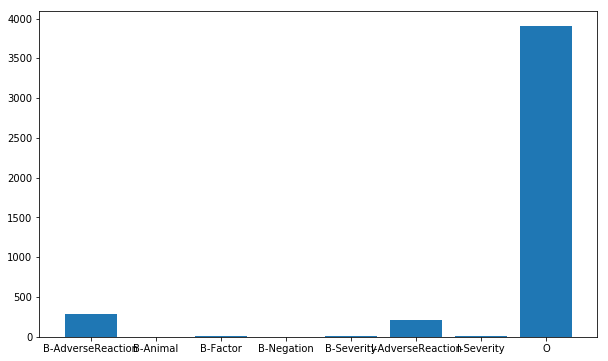

In [3]:
print(len(tags_per_file))
#répartition des tags pour le fichier 'ADCETRIS'
adcetris = Counter(tags_per_file['ADCETRIS'])
print(adcetris)

fig = plt.figure(figsize=(10,6))
plt.bar(adcetris.keys(), adcetris.values())
plt.savefig('ADCETRIS_distribution.png')
plt.show()

Counter({'O': 236241, 'B-AdverseReaction': 13064, 'I-AdverseReaction': 10733, 'B-Severity': 816, 'I-Severity': 722, 'B-Factor': 602, 'I-DrugClass': 390, 'B-DrugClass': 249, 'B-Negation': 98, 'I-Factor': 47, 'B-Animal': 44, 'I-Negation': 22})


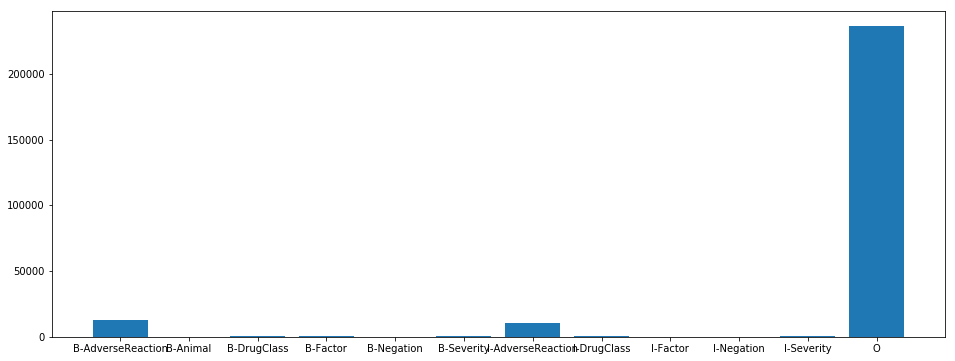

In [4]:
# Distribution totale
total = Counter()
for tags in tags_per_file.values():
    total += Counter(tags)
print(total)

fig = plt.figure(figsize=(16,6))
plt.bar(total.keys(), total.values())
plt.savefig('total_distribution.png')
plt.show()

{'I-AdverseReaction': 101, 'B-DrugClass': 35, 'I-Severity': 59, 'B-AdverseReaction': 101, 'B-Animal': 23, 'B-Factor': 87, 'B-Negation': 43, 'I-Factor': 11, 'O': 101, 'B-Severity': 87, 'I-Negation': 9, 'I-DrugClass': 30}


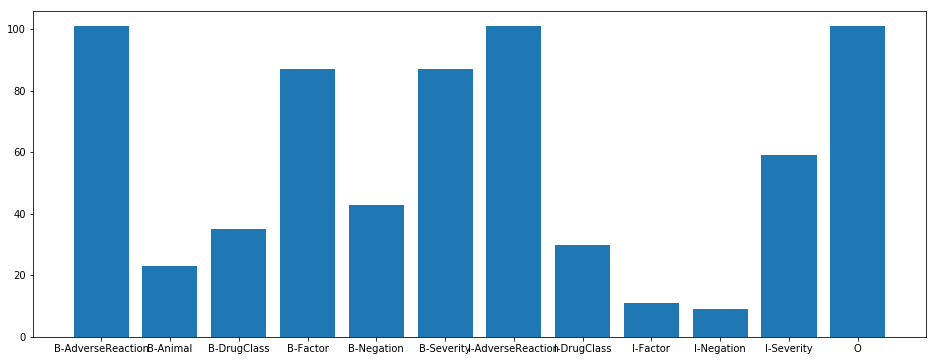

In [5]:
# Nombre de textes contenant le même exemple
unique_tags = total.keys()
game = {k:0 for k in unique_tags}
for tag in unique_tags:
    for tags in tags_per_file.values():
        if tag in tags:
            game[tag] += 1
print(game)

fig = plt.figure(figsize=(16,6))
plt.bar(game.keys(), game.values())
plt.savefig('game_distribution.png')
plt.show()

# Stats sur les exemples

In [6]:
# Répartition des effets secondaires pour chaque notice

# Vocabulaire des effets sur toutes les notices
voc = Counter()
for words in effects_per_file.values():
    voc += Counter(words)
print('===== VOCABULAIRE TOTAL, MOST_COMMON(10) ======')
print(voc.most_common(20))

print('----------------------')
print('===== VOCABULAIRE SUR ADCETRIS, MOST_COMMON(10) ======')
adcetris_effects = Counter(effects_per_file['ADCETRIS'])
print(adcetris_effects.most_common(20))

===== VOCABULAIRE TOTAL, MOST_COMMON(10) ======
[('', 1012), ('pain', 446), ('reactions', 345), ('increased', 311), ('infections', 273), ('in', 256), ('nausea', 251), ('infection', 237), ('rash', 235), ('of', 233), ('diarrhea', 226), ('decreased', 219), ('hypersensitivity', 209), ('headache', 206), ('site', 201), ('risk', 193), ('fatal', 192), ('may', 188), ('serious', 185), ('tract', 175)]
----------------------
===== VOCABULAIRE SUR ADCETRIS, MOST_COMMON(10) ======
[('neuropathy', 35), ('peripheral', 27), ('', 20), ('reactions', 14), ('sensory', 14), ('neutropenia', 13), ('infection', 12), ('infusion', 12), ('pain', 11), ('nausea', 11), ('respiratory', 10), ('toxicity', 10), ('cough', 9), ('tract', 9), ('related', 9), ('anemia', 9), ('motor', 9), ('pyrexia', 9), ('fatigue', 8), ('infections', 8)]


In [7]:
# Nombre de textes contenant le même exemple
unique_effects = voc.keys()
film = {k:0 for k in unique_effects}
for e in unique_effects:
    for effects in effects_per_file.values():
        if e in effects:
            film[e] += 1
print('===== NOMBRE DE TEXTES CONTENANT LE MEME EXEMPLE, MOST_COMMON(10) ======')
print(Counter(film).most_common(20))

===== NOMBRE DE TEXTES CONTENANT LE MEME EXEMPLE, MOST_COMMON(10) ======
[('', 82), ('pain', 81), ('nausea', 77), ('rash', 75), ('reactions', 70), ('headache', 69), ('increased', 65), ('may', 64), ('of', 64), ('hypersensitivity', 61), ('in', 60), ('diarrhea', 59), ('abdominal', 57), ('dizziness', 57), ('vomiting', 55), ('infection', 54), ('risk', 53), ('respiratory', 52), ('edema', 51), ('upper', 51)]
